In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.layers
model.layers[1].name

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))




4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7262 - accuracy: 0.7626 - val_loss: 0.5268 - val_accuracy: 0.8186
Epoch 2/30
1719/1719 [===================

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
#history.epoch

In [ ]:
#history.history

In [ ]:
import pandas as pd
df=pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.726195,0.762582,0.526754,0.8186
1,0.493458,0.828327,0.473892,0.8340
2,0.447561,0.843418,0.458373,0.8424
3,0.420327,0.852509,0.392285,0.8662
4,0.399692,0.859855,0.393608,0.8686
5,0.382229,0.865745,0.385179,0.8664
6,0.368188,0.870655,0.387269,0.8634
7,0.356275,0.874691,0.375641,0.8684
8,0.345848,0.877036,0.347132,0.8786
9,0.334271,0.880818,0.353061,0.8734


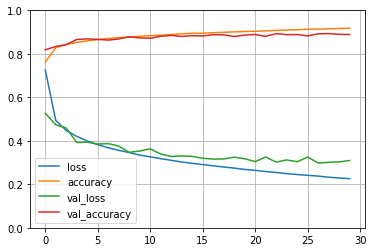

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.3346 - accuracy: 0.8474


[59.334556579589844, 0.8474000096321106]

In [ ]:
#we can use the model’s predict() method to make predictions on new instances.
# Since we don’t have actual new instances, we will just use the first 3 instances of
#the test set

In [ ]:
X_new = X_test[:3]
y_proba= model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#If you only care about the class with the highest estimated
#probability (even if that probability is quite low) then you can use the pre
#dict_classes() method instead:
y_pred=model.predict_classes(X_new)
y_pred


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
# And the classifier actually classified all three images correctly

In [ ]:
# other method after year  2021 
import numpy as np

np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')